<a href="https://colab.research.google.com/github/ShuPriX/Handwriting-Prediction/blob/main/handwritten_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [14]:
(X_train,Y_train),(X_test,Y_test)= keras.datasets.mnist.load_data()

In [15]:
X_test.shape

(10000, 28, 28)

In [16]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

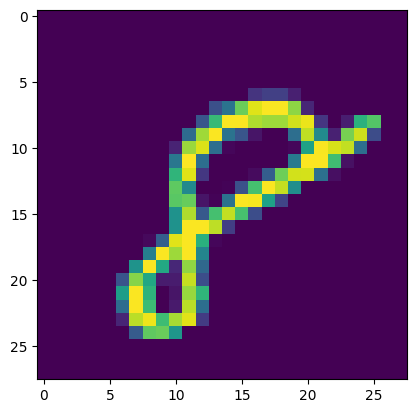

In [17]:
import matplotlib.pyplot as plt
plt.imshow(X_train[-1])

In [18]:
X_train = X_train/225
X_test = X_test/255

In [19]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [20]:
model = Sequential()

model.add(Flatten(input_shape= (28,28)))
model.add(Dense(128,activation= 'relu'))
model.add(Dense(32,activation= 'relu'))
model.add(Dense(10,activation= 'sigmoid'))


In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer='Adam', metrics =['accuracy'])

In [23]:
history = model.fit(X_train,Y_train,epochs = 25, validation_split=0.2, callbacks = tensorflow.keras.callbacks.EarlyStopping(patience =3, restore_best_weights = True))
#history = model.fit(X_train,Y_train,epochs = 25, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 7s 3ms/step - loss: 0.2788 - accuracy: 0.9186 - val_loss: 0.1446 - val_accuracy: 0.9580
Epoch 2/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1154 - accuracy: 0.9640 - val_loss: 0.1143 - val_accuracy: 0.9656
Epoch 3/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0766 - accuracy: 0.9764 - val_loss: 0.1070 - val_accuracy: 0.9682
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0583 - accuracy: 0.9818 - val_loss: 0.0904 - val_accuracy: 0.9739
Epoch 5/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0452 - accuracy: 0.9856 - val_loss: 0.1039 - val_accuracy: 0.9718
Epoch 6/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0361 - accuracy: 0.9883 - val_loss: 0.1048 - val_accuracy: 0.9736
Epoch 7/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0290 - accuracy: 0.9906 - val_loss: 0.1111 - val_accuracy:

In [24]:
Y_prob =model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [25]:
Y_pred = Y_prob.argmax(axis = 1)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.9759

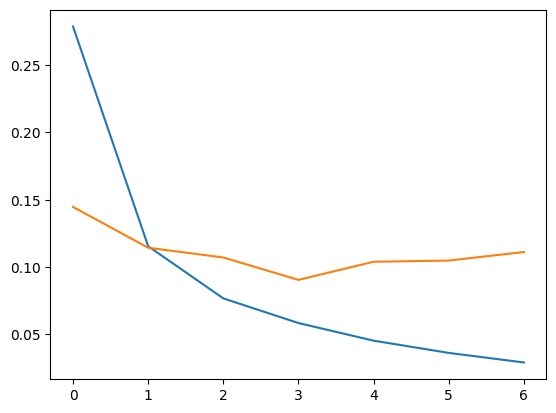

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

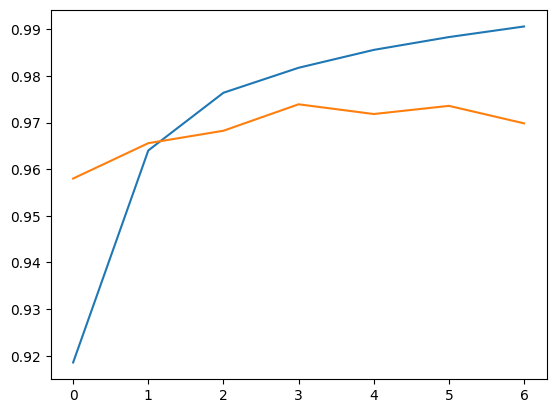

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [29]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis = 1)

1/1 [==============================] - 0s 41ms/step


array([7])

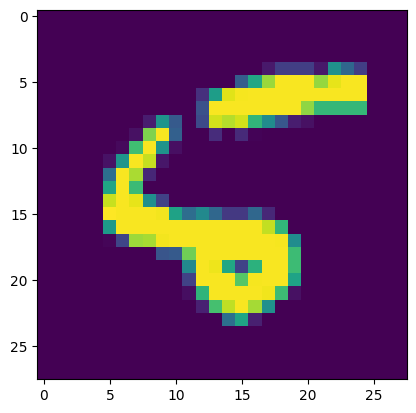

In [30]:
plt.imshow(X_test[8])